In [1]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2
    Uninstalling pip-22.2:
      Successfully uninstalled pip-22.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 82.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 31.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.7/504.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 26.3 MB/s eta 0:00:0000:010

In [3]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten 

from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras import datasets, layers, models 
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

2022-08-12 18:38:24.762076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-12 18:38:24.762162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Antes de empezar, mover las carpetas Cat y Dog que hicimos a una carpeta que se llame Pets y borrar los zip.

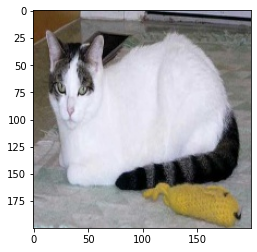

In [8]:
# Sample a cat image
sample_cat = mpimg.imread('Pets/Cat/image3814.jpg') #vemos la imagen usando matplotlib
plt.imshow(sample_cat)
plt.show()

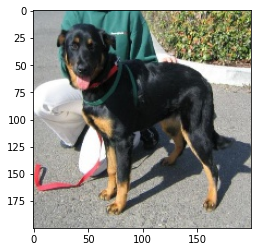

In [9]:
# Sample a dog image
sample_dog = mpimg.imread('Pets/Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [10]:
# Count total images
data_dir = pathlib.Path('./Pets') 
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

24946

In [11]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset

# Las constantes por convencion las ponemos en mayuscula
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32


# Dividimos dataset en aprendizaje y validación
# En general se divide en 3 en tareas de deeplearning: train, validation y test

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_WITDH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 24946 files belonging to 2 classes.
Using 19957 files for training.


2022-08-12 18:40:49.804739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-12 18:40:49.806279: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-12 18:40:49.807542: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abaron32-imageclassifie-vunkdnjaufq): /proc/driver/nvidia/version does not exist
2022-08-12 18:40:49.808797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #20% de validacion
  subset="validation",
  seed=123,
  image_size=(IMAGE_WITDH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)


Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [13]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [14]:
# Create the deep learning architecture

# las imagenes a color tienen 3 canales: RGB
IMAGE_CHANNELS=3 
IMAGE_WIDTH=200
IMAGE_HEIGHT=200


# https://medium.com/analytics-vidhya/understanding-resnet-architecture-869915cc2a98

# Otra es: SqueezeNet https://towardsdatascience.com/review-squeezenet-image-classification-e7414825581a

# Otra arquitectura: AlexNet https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

model = Sequential([

# 32 es el kernel
Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25), # es para que la red neuronal no se aprenda de memoria la estructura de los datos

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(), 
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), 
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-08-12 18:41:06.789554: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.
2022-08-12 18:41:06.869060: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.
2022-08-12 18:41:06.915952: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [15]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

# validation_data para que vaya tuneando la arquitectura de red neuronal
# para que haga el aprendizaje bien le pedimos 10 epochs

Epoch 1/10


2022-08-12 18:41:15.667986: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.
2022-08-12 18:41:15.724212: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.


624/624 [==============================] - 1314s 2s/step - loss: 0.6915 - accuracy: 0.6558 - val_loss: 0.5239 - val_accuracy: 0.7404
Epoch 2/10
624/624 [==============================] - 1159s 2s/step - loss: 0.5106 - accuracy: 0.7499 - val_loss: 0.5455 - val_accuracy: 0.7118
Epoch 3/10
624/624 [==============================] - 1226s 2s/step - loss: 0.4427 - accuracy: 0.7922 - val_loss: 0.5179 - val_accuracy: 0.7623
Epoch 4/10
624/624 [==============================] - 1195s 2s/step - loss: 0.3884 - accuracy: 0.8248 - val_loss: 0.4735 - val_accuracy: 0.7853
Epoch 5/10
624/624 [==============================] - 1186s 2s/step - loss: 0.3378 - accuracy: 0.8508 - val_loss: 0.4655 - val_accuracy: 0.8058
Epoch 6/10
624/624 [==============================] - 1202s 2s/step - loss: 0.2833 - accuracy: 0.8784 - val_loss: 0.4841 - val_accuracy: 0.7945
Epoch 7/10
624/624 [==============================] - 1186s 2s/step - loss: 0.2373 - accuracy: 0.9015 - val_loss: 4.2160 - val_accuracy: 0.5001
Epo

In [16]:
# Guardar el Modelo
model.save('net_model_catdog.h5')

In [17]:
# Carga el modelo

loaded_model = keras.models.load_model('net_model_catdog.h5')

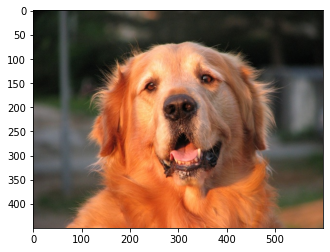

In [19]:
dog = mpimg.imread('cute_dog.jpg') #vemos la imagen usando matplotlib
plt.imshow(dog)
plt.show()

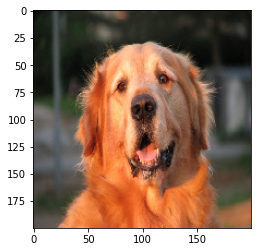

In [20]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("dog.jpg",target_size=(200,200))
img = np.asarray(img)
plt.imshow(img)

In [21]:
# Predict
img_expanded = np.expand_dims(img, axis=0)
output = loaded_model.predict(img_expanded)
output

1/1 [==============================] - 0s 338ms/step


array([[0.9997394]], dtype=float32)